In [1]:
from numpy import array

In [2]:
anisotropy_row = array([0.062,
                        0.063,
                        0.058,
                        0.061,
                        0.061,
                        0.065,
                        0.068,
                        0.077,
                        0.102,
                        0.148,
                        0.162,
                        0.174])
arp23_concentration_row = array([2,
                                 4,
                                 7,
                                 14,
                                 29,
                                 58,
                                 116,
                                 232,
                                 463,
                                 927,
                                 1854,
                                 3707]) / 1000.0

In [3]:
%matplotlib inline
from matplotlib.pyplot import subplots

In [4]:
from scipy.optimize import curve_fit
from numpy import sqrt

In [5]:
def dna_anisotropy(arp23_concentration, dissociation_constant, min_anisotropy, max_anisotropy):
    anisotropy = min_anisotropy + 0.5 * (max_anisotropy - min_anisotropy) * (dissociation_constant + arp23_concentration + 0.010 - 
                                       sqrt((dissociation_constant + arp23_concentration + 0.010)**2 - 
                                            4 * arp23_concentration * 0.010)) / 0.010
    return anisotropy
def dna_anisotropy_hill(arp23_concentration, dissociation_constant, min_anisotropy, max_anisotropy, hill_coeff):
    anisotropy = min_anisotropy + 0.5 * (max_anisotropy - min_anisotropy) * (dissociation_constant + arp23_concentration**hill_coeff + 0.010 - 
                                       sqrt((dissociation_constant + arp23_concentration**hill_coeff + 0.010)**2 - 
                                            4 * arp23_concentration**hill_coeff * 0.010)) / 0.010
    return anisotropy

In [6]:
p2opt, p2cov = curve_fit(dna_anisotropy, arp23_concentration_row, anisotropy_row, p0 = [0.5, 0.07, 0.2])
p3opt, p3cov = curve_fit(dna_anisotropy_hill, arp23_concentration_row, anisotropy_row, p0 = [0.5, 0.07, 0.2, 1.0])

Text(0.5,0,'Arp2/3 complex ($\\mu$M)')

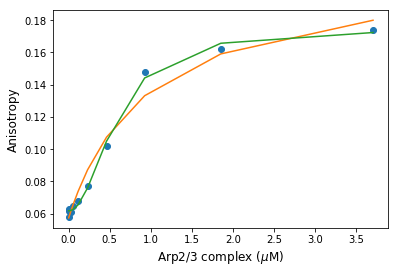

In [7]:
figure_handle, axes_handle = subplots()
axes_handle.plot(arp23_concentration_row, anisotropy_row, 'o')
axes_handle.plot(arp23_concentration_row, dna_anisotropy(arp23_concentration_row, *p2opt))
axes_handle.plot(arp23_concentration_row, dna_anisotropy_hill(arp23_concentration_row, *p3opt))
axes_handle.set_ylabel(r'Anisotropy', fontsize = 12)
axes_handle.set_xlabel(r'Arp2/3 complex ($\mu$M)', fontsize = 12)

In [8]:
from numpy import diag
print(p2opt)
print(sqrt(diag(p2cov)))
print(p3opt)
print(sqrt(diag(p3cov)))

[0.94888348 0.05709055 0.21152219]
[0.24976548 0.00316611 0.01447788]
[0.31136499 0.06184915 0.17454788 2.10843348]
[0.05957339 0.00119939 0.00322557 0.20379661]
